# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import os 
if not os.path.exists("output_data"):
    os.makedirs("output_data")


# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 587


In [3]:
url = "https://api.openweathermap.org/data/2.5/weather?"
city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"
print(city_url)
city_weather = requests.get(city_url).json()
pprint(city_weather)
city_lat = city_weather["coord"]["lat"]
city_lng = city_weather["coord"]["lon"]
city_max_temp = city_weather["main"]["temp_max"]
city_humidity = city_weather["main"]["humidity"] 
city_clouds = city_weather["clouds"]["all"] 
city_wind = city_weather["wind"]["speed"]
city_country = city_weather["sys"]["country"] 
city_date = city_weather["dt"]
city_max_temp



https://api.openweathermap.org/data/2.5/weather?q=bilibino&appid=d45507feee3f18270b7b205a3886ecda&units=metric
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 68.0546, 'lon': 166.4372},
 'dt': 1727727368,
 'id': 2126682,
 'main': {'feels_like': -2.77,
          'grnd_level': 969,
          'humidity': 96,
          'pressure': 1005,
          'sea_level': 1005,
          'temp': -2.77,
          'temp_max': -2.77,
          'temp_min': -2.77},
 'name': 'Bilibino',
 'snow': {'1h': 0.1},
 'sys': {'country': 'RU', 'sunrise': 1727723193, 'sunset': 1727763673},
 'timezone': 43200,
 'visibility': 383,
 'weather': [{'description': 'light snow',
              'icon': '13d',
              'id': 600,
              'main': 'Snow'}],
 'wind': {'deg': 44, 'gust': 1.08, 'speed': 1.16}}


-2.77

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        response = requests.get(city_url)
        response.raise_for_status() #Raise an exception for bad status codes
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"] 
        city_clouds = city_weather["clouds"]["all"] 
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"] 
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except (requests.exceptions.RequestException, KeyError, ValueError) as e:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | zayed city
Processing Record 2 of Set 1 | iqaluit
Processing Record 3 of Set 1 | lapeer
Processing Record 4 of Set 1 | badger
Processing Record 5 of Set 1 | blackmans bay
Processing Record 6 of Set 1 | olonkinbyen
Processing Record 7 of Set 1 | cabedelo
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | taiohae
City not found. Skipping...
Processing Record 10 of Set 1 | saint-philippe
Processing Record 11 of Set 1 | waitangi
Processing Record 12 of Set 1 | cumana
Processing Record 13 of Set 1 | maintirano
Processing Record 14 of Set 1 | ribeira grande
Processing Record 15 of Set 1 | vallenar
Processing Record 16 of Set 1 | talnakh
Processing Record 17 of Set 1 | labasa
Processing Record 18 of Set 1 | bethel
Processing Record 19 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 20 of Set 1 | toliara
Processing Record 21 of Set 1 | puerto natales
Processing 

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,zayed city,24.3768,54.5890,34.08,46,0,3.60,AE,1727727368
1,iqaluit,63.7506,-68.5145,7.85,65,75,3.60,CA,1727727369
2,lapeer,43.0514,-83.3188,23.84,60,28,4.52,US,1727727371
3,badger,64.8000,-147.5333,7.77,59,20,0.89,US,1727727372
4,blackmans bay,-43.0167,147.3167,12.63,59,31,1.34,AU,1727727374


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,zayed city,24.3768,54.5890,34.08,46,0,3.60,AE,1727727368
1,iqaluit,63.7506,-68.5145,7.85,65,75,3.60,CA,1727727369
2,lapeer,43.0514,-83.3188,23.84,60,28,4.52,US,1727727371
3,badger,64.8000,-147.5333,7.77,59,20,0.89,US,1727727372
4,blackmans bay,-43.0167,147.3167,12.63,59,31,1.34,AU,1727727374


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

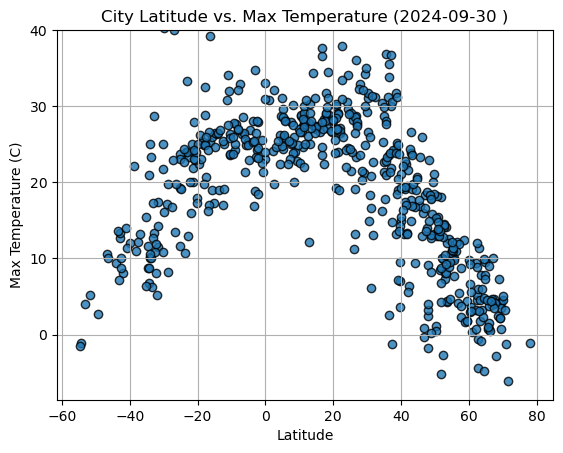

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%Y-%m-%d "))
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)
plt.ylim(None,40)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

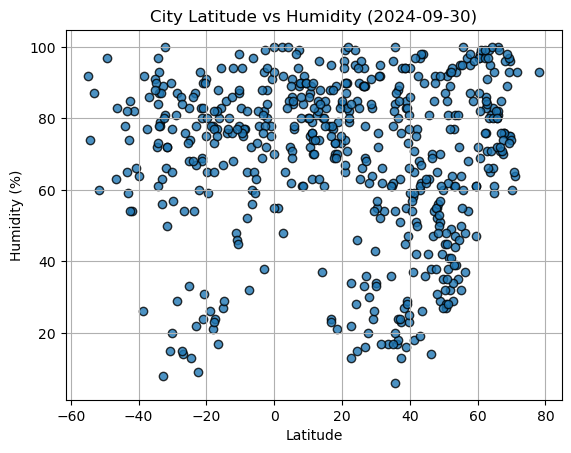

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidths=1, marker="o", alpha=0.8)
plt.title("City Latitude vs Humidity (%s)" %time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)


# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

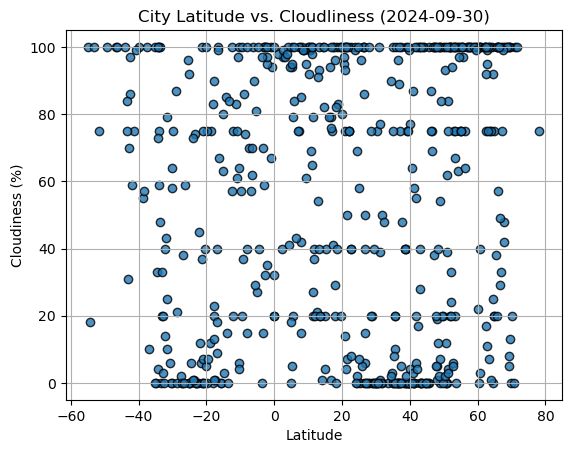

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidths=1, marker="o",alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudliness (%s)" %time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

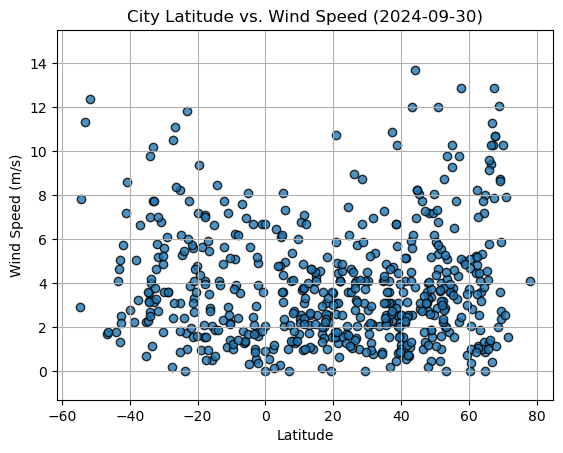

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidth=1, alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" %time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)
plt.ylim(None,15.5)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,xy=(x_values.mean(), regress_values.mean()), xycoords='data',xytext=(100,50),textcoords='figure points',fontsize=12, color="red")
    print(f"The r^2 value is:{rvalue**2}")
   

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,zayed city,24.3768,54.5890,34.08,46,0,3.60,AE,1727727368
1,iqaluit,63.7506,-68.5145,7.85,65,75,3.60,CA,1727727369
2,lapeer,43.0514,-83.3188,23.84,60,28,4.52,US,1727727371
3,badger,64.8000,-147.5333,7.77,59,20,0.89,US,1727727372
5,olonkinbyen,70.9221,-8.7187,-1.25,64,100,7.93,SJ,1727727375


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] <0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,blackmans bay,-43.0167,147.3167,12.63,59,31,1.34,AU,1727727374
6,cabedelo,-6.9811,-34.8339,26.37,72,57,7.58,BR,1727727317
7,port elizabeth,-33.9180,25.5701,10.16,87,75,9.77,ZA,1727727378
8,saint-philippe,-21.3585,55.7679,21.89,80,37,5.62,RE,1727727381
9,waitangi,-43.9535,-176.5597,9.34,78,100,1.79,NZ,1727727382


###  Temperature vs. Latitude Linear Regression Plot

The r^2 value is:0.64536095959471


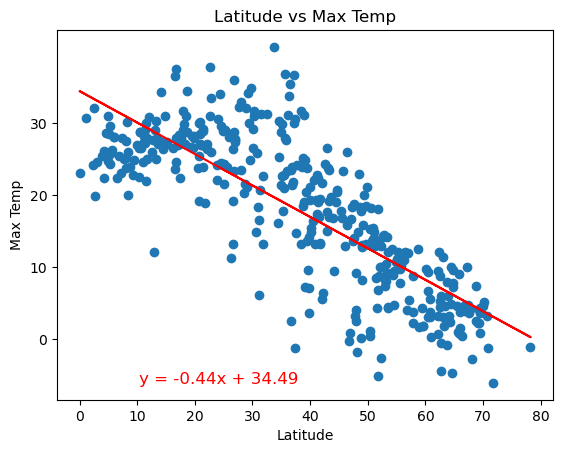

In [16]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp', (10,40))
plt.scatter(x_values, y_values)
plt.title("Latitude vs Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.yticks(np.arange(0,40,10))
plt.show()





The r^2 value is:0.4304770686114034


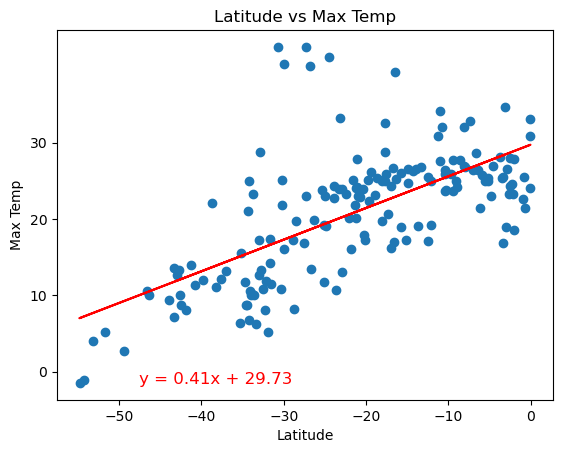

In [17]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp', (10,40))
plt.scatter(x_values, y_values)
plt.title("Latitude vs Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.yticks(np.arange(0,40,10))
plt.show()

**Discussion about the linear relationship:** In the northern hemisphere, the latitude has a negative correlation to the maximum temperature. The relationship is flipped in the southern hemisphere where there is  a positive correlation between the latitude and the maximum temperature. The regression line for the northern hemisphere, fits the data better with a coefficient of determination of 0.69.

### Humidity vs. Latitude Linear Regression Plot

The r^2 value is:0.002726433419402158


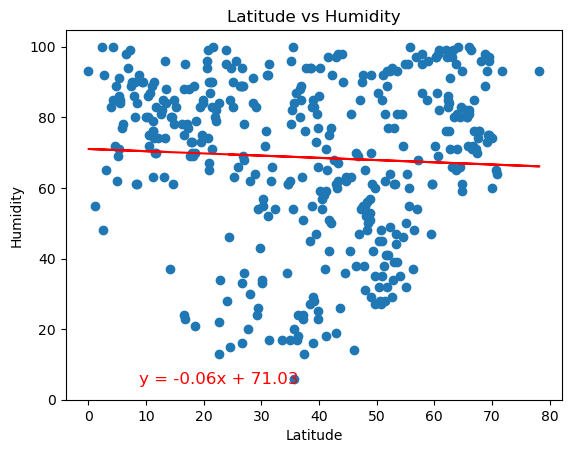

In [18]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (40,10))
plt.scatter(x_values, y_values)
plt.title("Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.yticks(np.arange(0,110,20))
plt.show()

The r^2 value is:0.0013869377719692348


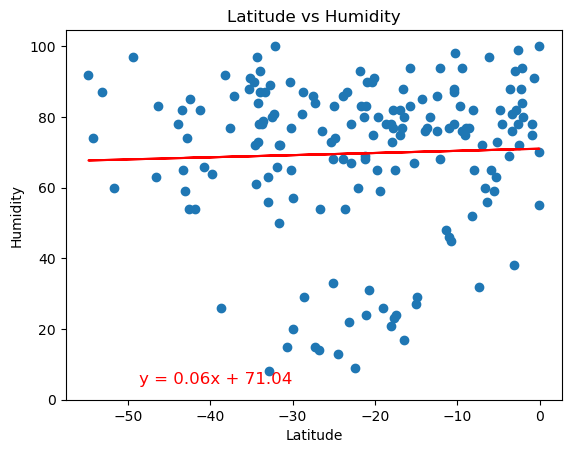

In [19]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (40,10))
plt.scatter(x_values, y_values)
plt.title("Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.yticks(np.arange(0,110,20))
plt.show()

**Discussion about the linear relationship:** There is no correlation between the latitude and humidity in both the northern and southern hemispheres. The coefficient of determination shows that none of the variability in the humidity in both hemispheres is explained by a change in latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2 value is:0.000126725194346488


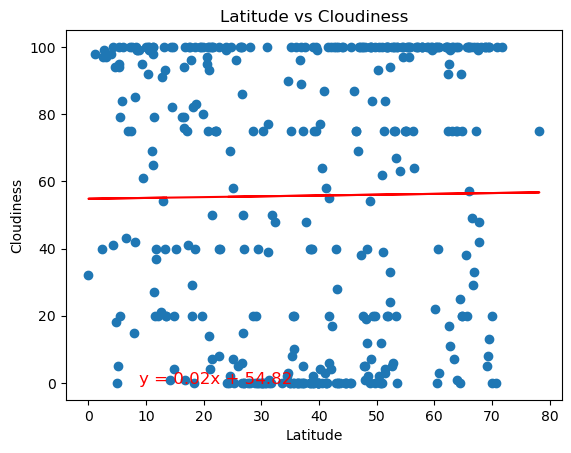

In [20]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values= northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (10,40))
plt.scatter(x_values, y_values)
plt.title("Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.yticks(np.arange(0,110,20))
plt.show()


The r^2 value is:0.0007191072736766994


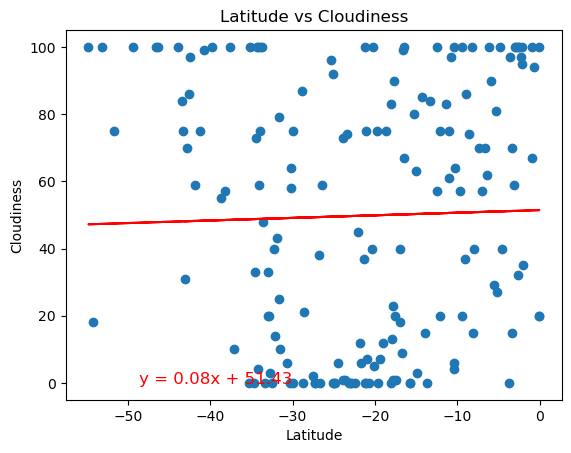

In [21]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (10,40))
plt.scatter(x_values, y_values)
plt.title("Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.yticks(np.arange(0,110,20))
plt.show()


**Discussion about the linear relationship:There is no correlation between the latitude and cloudiness in both the northern and southern hemispheres. The coefficient of determination shows that none of the variability in the cloudiness in both hemispheres is explained by a change in latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2 value is:0.0682192895124014


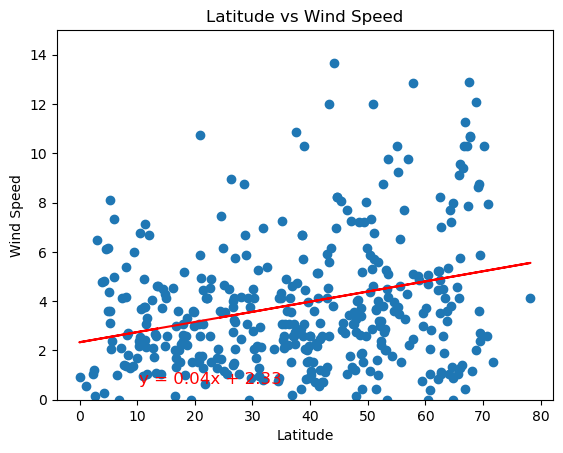

In [28]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (15,80))
plt.scatter(x_values, y_values)
plt.title("Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.yticks(np.arange(0,15,2))
plt.ylim(0,15)
plt.show()


The r^2 value is:0.07758507904548377


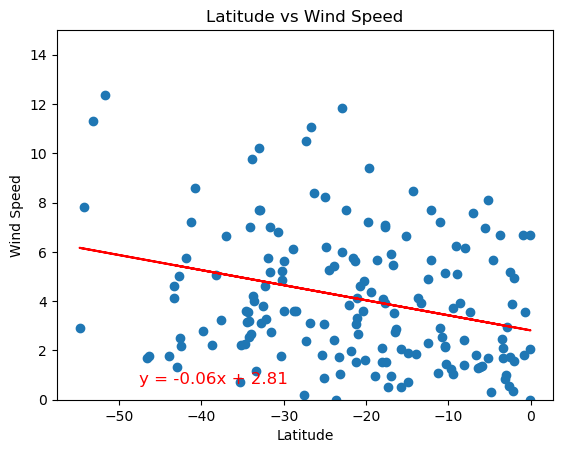

In [31]:
# Southern Hemisphere
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (10,40))
plt.scatter(x_values,y_values)
plt.title("Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.yticks(np.arange(0,15,2))
plt.ylim(0,15)
plt.show()


**Discussion about the linear relationship: Wind Speed has a positive correlation to latitude in the northern hemisphere and a negative correlation in the southern hemisphere. The r-value is low in both hemispheres which means the correlation is not very strong.